# Sales Performance Analysis

In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# upload dataset online_retail_II.csv
files.upload()
data = pd.read_csv('online_retail_II.csv')

# print data
print(data)

Saving online_retail_II.csv to online_retail_II.csv
        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price

## Section 1

### Create New Feature: Year

In [3]:
# convert 'InvoiceDate' to datatime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# create 'Year' column that contains year from 'InvoiceDate' column
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year
# print data
print(data)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Year  
0       2009-12

### Filtering Data

In [4]:
# filter data based on conditions
sales = data[(data['Quantity'] > 0) & (~data['Invoice'].str.startswith('C'))]
# print sales
print(sales)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Year  
0       2009-12

### Create New Feature: Revenue

In [5]:
# create 'Revenue' column that contains 'Quantity' * 'Price'
data['Revenue'] = data['Quantity'] * data['Price']
# print data
print(data)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Year  Revenue  
0     

### Average of Revenue per Year

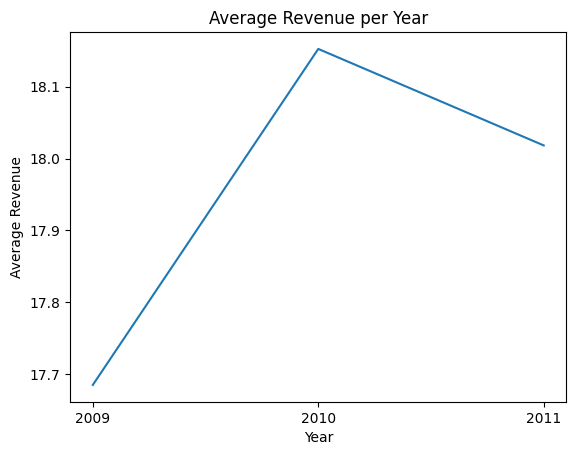

In [6]:
# calculate average revenue per year
average_revenue = data.groupby('Year')['Revenue'].mean()
# create visualization
plt.plot(average_revenue.index, average_revenue.values)
plt.xticks(average_revenue.index, labels=average_revenue.index)
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()

### Interpretation

>Based on the visualization output of number 4, average revenue per year has remained relatively stable, with only a slight increase from 2009 to 2010 and a light decrease from 2010 to 2011. This may suggest that the company has been able to maintain a consistent level of sales over the years without experiencing significant fluctuations.

## Section 2

### Filtering Data

#### Customers who finished their purchases

In [7]:
# filter data for customers that made purchases
finished = sales[sales['Customer ID'].notna()]
# print finished
print(finished)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Year  
0       2009-12

#### Customers who canceled their purchases

In [8]:
# filter data for customers that canceled their orders
cancel = data[data['Invoice'].str.startswith('C')]
# print cancel
print(cancel)

         Invoice StockCode                       Description  Quantity  \
178      C489449     22087          PAPER BUNTING WHITE LACE       -12   
179      C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180      C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181      C489449     21896                POTTING SHED TWINE        -6   
182      C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...          ...       ...                               ...       ...   
1065910  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
1067002  C581499         M                            Manual        -1   
1067176  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
1067177  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
1067178  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate   Price  Customer ID         Country  Year  \
178     2009-12-01 10:33:00    2.95  

### Number of Finished and Canceled Transactions Each Year

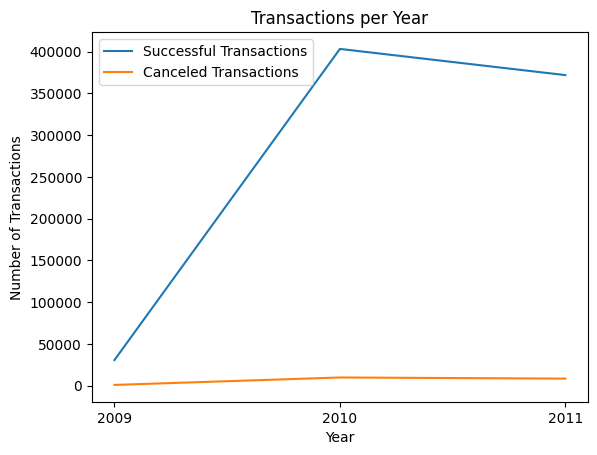

In [9]:
# count successful transactions from finished variable
success_count = finished.groupby('Year')['Invoice'].count()
# count canceled transactions from cancel variable
cancel_count = cancel.groupby('Year')['Invoice'].count()
# create visualization
plt.plot(success_count.index, success_count.values, label='Successful Transactions')
plt.plot(cancel_count.index, cancel_count.values, label='Canceled Transactions')
plt.xticks(success_count.index, labels=success_count.index)
plt.title('Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

### Cancellation Rate

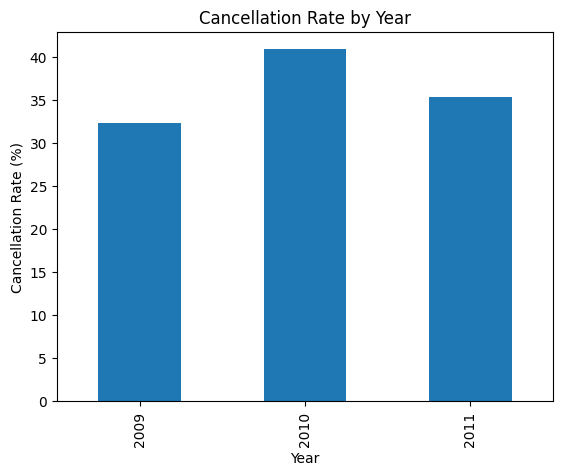

In [10]:
# count total customers that made purchases for each year
total_customers = finished.groupby('Year')['Customer ID'].nunique()
# count number of customers that canceled their orders for each year
canceled_customers = cancel.groupby('Year')['Customer ID'].nunique()
# calculate calcellation rate for each year
cancellation_rate = (canceled_customers / total_customers) * 100
# create visualization
cancellation_rate.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate by Year')
plt.show()

### Interpretation

>Based on the visualization output of numbers 3 and 4, successful transactions increased from 2009 to 2010 and decreased slightly in 2011. Besides that, the number of canceled transactions increased from 2009 to 2010 and decreased in 2011.

>The cancellation rate in 2010 was higher than the other years, possibly due to various factors such as economic conditions or customer satisfaction. In 2011, the cancellation rate decreased even though the number of canceled transactions remained relatively high.